# Age Estimation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/CIS_5810_Project_9_Classification_Student_Template_V2

/content/drive/MyDrive/Colab Notebooks/CIS_5810_Project_9_Classification_Student_Template_V2


In [3]:
import os
import numpy as np
import torch
from helperT import *

# Loading Data

PyTorch Datasets are objects that have a single job: to return a single datapoint on request. The exact form of the datapoint varies between tasks: it could be a single image, a slice of a time series, a tabular record or something else entirely. These are then passed on to a Dataloader which handles batching of datapoints and parallelism. 

We've written the dataloader function and transform function for you. `get_dataloaders()` will return three object: train_loader, val loader and test_loader.

```
Arguments:
    None
Return:
    train_loader      -- tensor,(y, x), [(32),(32, 2048)] 
    val_loader        -- tensor,(y, x), [(32),(32, 2048)] 
    test_loader       -- tensor,(y, x), [(32),(32, 2048)] 
```

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


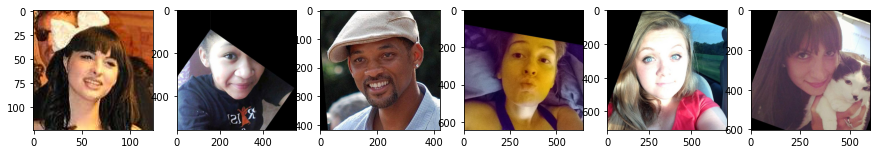

In [4]:
train_loader, val_loader, test_loader = get_dataloaders("DATASET/")
show_data('DATASET/')

# Define Linear Model
In this part, we will define our linear regression model here. First let's declare a class called `LinearClassifier` that inherit from `torch.nn.moudle`. Then you have to define the initialization in `__init__`, and define forward propogation in `forward` function.
Hint: You can use torch.nn.Linear.
```
Arguments:
    __init__        --(input_size, output_size)
Return:
    out      -- tensor, network calculation results 
```


In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.__version__)
print(device)

1.13.0+cu116
cuda:0


In [6]:
class LinearClassifier(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearClassifier, self).__init__()
        #############################################
        # TODO: YOUR CODE HERE
        ############################################# 
        self.linear = torch.nn.Linear(in_features=inputSize,out_features=outputSize)

    def forward(self, x):
        #############################################
        # TODO: YOUR CODE HERE
        ############################################# 
        out = self.linear(x)
        
        return out

In [7]:
## Test ##
model = LinearClassifier(10, 2)

x = torch.zeros((5, 10))
y = model(x)
# x=x.cuda()
# y=y.cuda()
assert y.shape[0] == 5
assert y.shape[1] == 2
print('test passed')

test passed


## softmax + CELoss


Epoch: 0 	 mae: 9.638 	 loss: 4.438
Epoch: 1 	 mae: 9.219 	 loss: 4.293
Epoch: 2 	 mae: 9.123 	 loss: 4.178
Epoch: 3 	 mae: 8.617 	 loss: 4.086
Epoch: 4 	 mae: 7.987 	 loss: 4.010
Epoch: 5 	 mae: 7.511 	 loss: 3.946
Epoch: 6 	 mae: 7.219 	 loss: 3.891
Epoch: 7 	 mae: 6.957 	 loss: 3.844
Epoch: 8 	 mae: 6.613 	 loss: 3.801
Epoch: 9 	 mae: 6.469 	 loss: 3.764
Epoch: 10 	 mae: 6.337 	 loss: 3.731
Epoch: 11 	 mae: 6.261 	 loss: 3.700
Epoch: 12 	 mae: 6.159 	 loss: 3.673
Epoch: 13 	 mae: 6.017 	 loss: 3.649
Epoch: 14 	 mae: 5.934 	 loss: 3.626
Epoch: 15 	 mae: 5.903 	 loss: 3.606
Epoch: 16 	 mae: 5.850 	 loss: 3.587
Epoch: 17 	 mae: 5.820 	 loss: 3.569
Epoch: 18 	 mae: 5.797 	 loss: 3.553
Epoch: 19 	 mae: 5.743 	 loss: 3.538
Epoch: 20 	 mae: 5.690 	 loss: 3.524
Epoch: 21 	 mae: 5.669 	 loss: 3.511
Epoch: 22 	 mae: 5.664 	 loss: 3.499
Epoch: 23 	 mae: 5.635 	 loss: 3.488
Epoch: 24 	 mae: 5.569 	 loss: 3.477
Epoch: 25 	 mae: 5.559 	 loss: 3.467
Epoch: 26 	 mae: 5.531 	 loss: 3.457
Epoch: 27 	

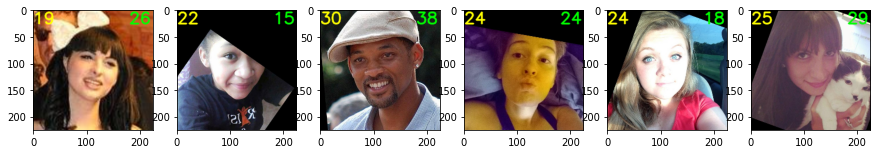

In [8]:
def train_softmax_cel():
    # TODO: Define model
    model = LinearClassifier(2048, 101).to(device)
    
    # TODO: Define SGD optimizer to update our weights and bias
    optimizer = torch.optim.SGD(model.parameters(),lr=0.001)#,momentum=0.9)
    
    # TODO: Define cross entropy loss criterion to calculate loss
    criterion = torch.nn.CrossEntropyLoss()

    for e in range(EPOCH):
        # Training model
        model.train()
        for i, (y, x) in enumerate(train_loader):
            #############################################
            # TODO: YOUR CODE HERE
            #############################################
            # calculate the gradient and update the model
            x, y = x.cuda().float(), y.cuda().long() 
            # print(x.shape)
            # print(y.shape)
            outputs=model(x)
            # print("out",outputs.shape)
            optimizer.zero_grad()
            loss=criterion(outputs,y) 
            loss.backward() 
            optimizer.step()
            # print(i)


        # Validating model
        model.eval()
        gt = []
        preds = []
        current_loss = 0
        for i, (y, x) in enumerate(val_loader):
            #############################################
            # TODO: YOUR CODE HERE
            #############################################
            # Calculate the validation outputs and validation loss in current epoch
            x, y = x.cuda().float(), y.cuda().long() 
            outputs = model(x)
            current_loss = criterion(outputs,y)

            # Save the predictions for validation sets and ground truth
            preds.append(torch.argmax(outputs, dim=-1).cpu().detach().numpy())
            # print(preds)
            # break
            gt.append(y.cpu().numpy())

        # Change prediction and ground truth to numpy
        preds = np.concatenate(preds, axis=0)
        gt = np.concatenate(gt, axis=0)
        # Calculate difference and mae
        diff = preds - gt
        mae = np.abs(diff).mean()
        print(f"Epoch: {e} \t mae: {mae:.3f} \t loss: {current_loss:.3f}")
    
    print("=> training finished")
    return model, preds, gt

model_softmax_cel, preds, gt = train_softmax_cel()
show_results(preds, gt)

## Test and Generate results file

In [9]:
prediction = test_cel(model_softmax_cel, test_loader, "softmax_cel.txt")
print("Test results has saved to softmax_cel.txt")
print(prediction[:10])

Test results has saved to softmax_cel.txt
[28.49116098 56.43300932 46.68938056 23.0414104  33.64912356 36.60151696
 43.76178453 40.54781467 23.24615614 52.45673062]


# Multi-layer classifier

In this part you will define your own multi-layer classifier. This model will make use of hidden state and non-linear activation functions, to give our model even more expressivity.

The architecture of this classifier is up to you, so feel free to experiment with various different architectures and see what performs best. The only requirement is that your model have **at least 2 layers**, and contain **at least one non-linearity**. For example, you could try using two fully connected layers (nn.Linear modules), with a ReLU activation in between. You are encouraged to explore the various modules within the `torch.nn` library.

Fill in the following module `MyClassifier`, to define the initialization and forward pass, as you did above.

In [10]:
from torch.nn import Flatten
class MyClassifier(torch.nn.Module):
    def __init__(self,inputSize, outputSize):
        super(MyClassifier, self).__init__()
        #############################################
        # TODO: YOUR CODE HERE
        ############################################# 
        self.model=torch.nn.Sequential(
            torch.nn.Linear(inputSize,inputSize//4),
            torch.nn.ReLU(),
            torch.nn.Linear(inputSize//4,inputSize//8),
            torch.nn.ReLU(),
            torch.nn.Linear(inputSize//8,outputSize)
            )
         

    def forward(self, x):
        #############################################
        # TODO: YOUR CODE HERE
        ############################################# 
        out=self.model(x)
        return out

## Train multi-layer classifier

You may use whatever module you'd like for the criterion and optimizer. You are also welcome to tune the hyperparameters as desired or modify the training structure to get the optimal model.

Epoch: 0 	 mae: 10.780 	 loss: 4.535
Epoch: 1 	 mae: 11.060 	 loss: 4.229
Epoch: 2 	 mae: 10.339 	 loss: 3.849
Epoch: 3 	 mae: 8.379 	 loss: 3.670
Epoch: 4 	 mae: 7.205 	 loss: 3.531
Epoch: 5 	 mae: 6.453 	 loss: 3.415
Epoch: 6 	 mae: 5.729 	 loss: 3.330
Epoch: 7 	 mae: 5.469 	 loss: 3.269
Epoch: 8 	 mae: 5.388 	 loss: 3.229
Epoch: 9 	 mae: 5.295 	 loss: 3.201
Epoch: 10 	 mae: 5.245 	 loss: 3.181
Epoch: 11 	 mae: 5.213 	 loss: 3.166
Epoch: 12 	 mae: 5.191 	 loss: 3.158
Epoch: 13 	 mae: 5.191 	 loss: 3.155
Epoch: 14 	 mae: 5.156 	 loss: 3.155
Epoch: 15 	 mae: 5.155 	 loss: 3.156
Epoch: 16 	 mae: 5.129 	 loss: 3.159
Epoch: 17 	 mae: 5.093 	 loss: 3.163
Epoch: 18 	 mae: 5.097 	 loss: 3.166
Epoch: 19 	 mae: 5.069 	 loss: 3.168
Epoch: 20 	 mae: 5.050 	 loss: 3.169
Epoch: 21 	 mae: 5.040 	 loss: 3.172
Epoch: 22 	 mae: 5.013 	 loss: 3.173
Epoch: 23 	 mae: 5.024 	 loss: 3.176
Epoch: 24 	 mae: 5.021 	 loss: 3.178
Epoch: 25 	 mae: 5.019 	 loss: 3.180
Epoch: 26 	 mae: 5.007 	 loss: 3.182
Epoch: 2

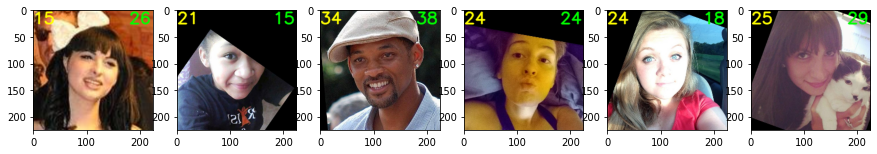

In [11]:
def train_my_classifier():
    # Define model
    model = MyClassifier(2048,101).to(device) #2048,101  [2048,4016,101]
    
    # Define an optimizer (from torch.optim)
    optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3, momentum=0.9, weight_decay=1e-5) #torch.optim.Adam(model.parameters(), lr=1e-4)

    # Define a loss function
    criterion = torch.nn.CrossEntropyLoss()

    for e in range(50):
        # Training model
        model.train()
        for i, (y, x) in enumerate(train_loader):
            #############################################
            # TODO: YOUR CODE HERE
            #############################################
            x, y = x.cuda().float(), y.cuda().long()
            # calculate the gradient and update the model
            # print(x.shape)
            train_out = model(x)
            optimizer.zero_grad()
            loss = criterion(train_out, y)
            loss.backward()
            optimizer.step()


        # Validating model
        model.eval()
        gt = []
        preds = []
        current_loss = 0
        for i, (y, x) in enumerate(val_loader):
            #############################################
            # TODO: YOUR CODE HERE
            #############################################
            # Calculate the validation outputs and validation loss in current epoch
            x, y = x.cuda().float(), y.cuda().long() 
            # print("x",x.shape)
            # print("y",y)
            outputs = model(x)
            # print("out",outputs)
            # print("out shape",outputs.shape)
            current_loss = criterion(outputs,y)

            # Save the predictions for validation sets and ground truth
            preds.append(torch.argmax(outputs, dim=-1).cpu().detach().numpy())
            gt.append(y.cpu().numpy())

        # Change prediction and ground truth to numpy
        preds = np.concatenate(preds, axis=0)
        gt = np.concatenate(gt, axis=0)
        # Calculate difference and mae
        diff = preds - gt
        mae = np.abs(diff).mean()
        print(f"Epoch: {e} \t mae: {mae:.3f} \t loss: {current_loss:.3f}")
        
    print("=> training finished")
    return model, preds, gt

model_multilayer, preds, gt = train_my_classifier()
show_results(preds, gt)

## Test and generate results file

In [12]:
prediction = test_cel(model_multilayer, test_loader, "results_multilayer.txt")
print("Test results has saved to results_multilayer.txt")
print(prediction[:10])

Test results has saved to results_multilayer.txt
[25.850802   62.93393998 49.84834214 21.16750633 31.79989978 35.15053057
 51.37103691 41.47964211 21.67747554 58.0926648 ]


## Reflection

Finally, please briefly answer the reflection questions below.

- Describe your model's architecture, and any changes you made to the training process, if applicable. Be sure to describe any layers, their dimensions / number of channels, and activation functions; also include your choice of optimizer, loss function, and any hyperparameters you may have changed.
- How does your model perform, relative to your single-layer linear network?
- Were there any changes to the architecture you made to your classifier that made it perform worse?


Answer: Model details:
I used a 2 Hidden Layer Network. I used the ReLU non linearities in between.

The model layers are:

$2048 → ReLU → 512 → ReLU → 256 → ReLU → 101$

Each number shows the number of nodes in that layer. Since the model is very high in complexity and likely to overfit, we also use L2-regularisation in the form on weight decay in the SGD optimizer to rectify that. 

The multilayer network performs better than the single layer with a loss of 3.234 for the former and a loss of 3.321 for the latter.

I made a lot of mistakes while creating the network by using nn.softmax and other layers in the wrong place and the loss had shot up and the network performed worse. 